In [1]:
# lambda = 0 then No Regularization and It will cause no penalty and make the model underfit
# That is why we need to tune the value of lambda or alpha (Hyper Parameter Training)
# Parameter -> Something which is learnt by the model (example: feature weights)
# Hyper Parameter -> Provided by the user and will impact the working of algo

In [2]:
# Current Approach
# If trained model is good we proceed with the model
# If trained model is bad then we tune the hyperparameter's and retrain it and predict r2_score and keep on doing until we get satisfactory model

In [3]:
# Approach
# Train data -> data used to train the model
# Tune data (Validation) -> data used to tune the model
# Test -> Data used to evaluate the final model

In [4]:
# Cons
# What if the amount of data is less...
# If the number of re-iterations are high , we will again over tune the model for both train and test

In [5]:
# K-fold Cross Validation
# Split data into train and test
# A particular chunk can have rows shuffled from any where in the dataset
# We divide the entire train data into chunks and I will test on a particular by training on other chunks 
# We take the final weights as average of weights in all models 

In [6]:
# # R² Score vs K in Cross-Validation

# ## Overview

# This document explains the relationship between R² score and the number of folds (k) in cross-validation.

# ## Typical Behavior

# ```
# R² Score
#    |
# 0.90|                    ●────●────●────●────●
#     |                  ●
# 0.85|              ●
#     |          ●
# 0.80|      ●
#     |  ●
# 0.75|●
#     |
#     +────────────────────────────────────────────
#      2   3   4   5   6   7   8   9  10  15  20
#                     K (Number of Folds)
# ```

# ## Key Observations

# ### 1. **Low K Values (k = 2-3)**
# - **Lower R² scores** due to:
#   - Smaller training sets
#   - Higher variance in estimates
#   - Less representative train/test splits

# ### 2. **Moderate K Values (k = 5-10)**
# - **Optimal range** for most applications
# - Good balance between:
#   - Computational efficiency
#   - Reliable performance estimates
#   - Reasonable training set size

# ### 3. **High K Values (k > 10)**
# - **Diminishing returns**
# - R² score stabilizes
# - Increased computation time
# - Very similar performance to moderate k values

# ## Sample Data Table

# | K Value | R² Score | Variance | Training Set Size (%) |
# |---------|----------|----------|----------------------|
# | 2       | 0.78     | 0.045    | 50%                  |
# | 3       | 0.82     | 0.032    | 67%                  |
# | 5       | 0.85     | 0.021    | 80%                  |
# | 10      | 0.87     | 0.015    | 90%                  |
# | 20      | 0.87     | 0.012    | 95%                  |

# ## Why Does This Happen?

# ### Bias-Variance Tradeoff
# - **Lower k**: Higher variance, lower bias (smaller training sets)
# - **Higher k**: Lower variance, slight increase in bias (more similar training sets)

# ### Training Set Size
# - As k increases, each fold uses more data for training
# - More training data generally leads to better model performance

# ### Statistical Stability
# - More folds provide more estimates to average
# - This reduces the variance of the performance metric

# ## Recommendations

# ### Typical Choices
# - **k = 5**: Good default for most datasets
# - **k = 10**: Standard choice for robust estimation
# - **k = n (LOOCV)**: For very small datasets (< 100 samples)

# ### Consider Dataset Size
# - **Small datasets (< 100)**: Use k = 5 or LOOCV
# - **Medium datasets (100-10,000)**: Use k = 10
# - **Large datasets (> 10,000)**: Use k = 5 for efficiency

# ## Practical Example

# For a dataset with 1000 samples:

# ```
# k = 5:  Train on 800, Test on 200 (5 iterations)
# k = 10: Train on 900, Test on 100 (10 iterations)
# ```

# **Expected R² progression:**
# - k = 2  → R² ≈ 0.78
# - k = 5  → R² ≈ 0.85
# - k = 10 → R² ≈ 0.87
# - k = 20 → R² ≈ 0.87

# ## Special Case: k = n (Leave-One-Out Cross-Validation)

# ### What is LOOCV?

# When **k equals the number of rows (n)** in your dataset, this is called **Leave-One-Out Cross-Validation (LOOCV)**.

# ### How It Works

# ```
# Dataset with n samples:
# - Iteration 1: Train on (n-1) samples, Test on sample 1
# - Iteration 2: Train on (n-1) samples, Test on sample 2
# - ...
# - Iteration n: Train on (n-1) samples, Test on sample n
# ```

# ### Characteristics

# | Aspect | LOOCV (k = n) |
# |--------|---------------|
# | Training set size | Maximum (n-1 samples) |
# | Test set size | Minimum (1 sample) |
# | Number of iterations | n (can be very large!) |
# | Variance | Very low |
# | Bias | Very low |
# | Computation cost | **Very high** |

# ### R² Score Behavior

# ```
# R² Score
#    |
# 0.90|                              ●  (k = n)
#     |                    ●────●────●
# 0.85|              ●
#     |          ●
# 0.80|      ●
#     |  ●
# 0.75|●
#     |
#     +────────────────────────────────────────────
#      2   3   4   5   7  10  15  20        n
#                     K (Number of Folds)
# ```

# When k = n:
# - **R² score is typically at its maximum** (or very close to it)
# - Each model is trained on the most data possible
# - Performance estimate has minimal bias

# ### Advantages of LOOCV

# 1. **Maximum training data**: Each fold uses (n-1)/n ≈ 100% of data
# 2. **Deterministic**: No randomness in splits
# 3. **Low bias**: Performance estimate very close to true performance
# 4. **Ideal for small datasets**: When you can't afford to lose training data

# ### Disadvantages of LOOCV

# 1. **Computationally expensive**: Must train n models
#    - Dataset with 1,000 rows = 1,000 training iterations
#    - Dataset with 10,000 rows = 10,000 training iterations!

# 2. **High variance**: Training sets are almost identical
#    - Each training set overlaps by (n-2)/(n-1) ≈ 99.9%
#    - Models are highly correlated
#    - Small changes in data can cause large changes in CV estimate

# 3. **Time-consuming**: Not practical for large datasets

# 4. **Not always better**: The variance can sometimes make k=10 more reliable

# ### When to Use k = n (LOOCV)?

# ✅ **Good for:**
# - Very small datasets (n < 100)
# - When training is fast
# - When you need maximum use of limited data
# - When reproducibility is critical (no random splits)

# ❌ **Avoid for:**
# - Large datasets (n > 1,000)
# - Computationally expensive models (deep learning, large ensembles)
# - When variance in CV estimate is a concern

# ### Practical Example

# For a dataset with **50 samples**:

# ```
# k = 5:  Train on 40,  Test on 10  → 5 iterations,  R² ≈ 0.82
# k = 10: Train on 45,  Test on 5   → 10 iterations, R² ≈ 0.85
# k = 50: Train on 49,  Test on 1   → 50 iterations, R² ≈ 0.87
# ```

# For a dataset with **10,000 samples**:

# ```
# k = 5:     Train on 8,000,  Test on 2,000 → 5 iterations,     R² ≈ 0.86
# k = 10:    Train on 9,000,  Test on 1,000 → 10 iterations,    R² ≈ 0.87
# k = 10000: Train on 9,999,  Test on 1     → 10,000 iterations, R² ≈ 0.87
#                                              (not worth it!)
# ```

# ## Conclusion

# The R² score typically increases with k and then plateaus. When k = n (LOOCV), you get the maximum training data per fold and often the highest R² score, but at a significant computational cost. 

# **Recommended approach:**
# - **Small datasets (n < 100)**: Consider LOOCV or k = n
# - **Medium datasets (100-10,000)**: Use k = 5 or k = 10
# - **Large datasets (n > 10,000)**: Use k = 5 for efficiency

# The improvement from k = 10 to k = n is usually minimal and not worth the computational expense.

In [7]:
# Grid Search CV
# We start with assumpted values of lambda , run k-fold cross validation , store the avg of train and test scores
# We will choose the lambda who have minimum difference b/w avg(train) and avg(test)

In [8]:
import pandas as pd
df = pd.read_csv('car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [10]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
df['Brand'] = df['CarName'].apply(lambda x:x.split(" ")[0])

In [12]:
df['Brand'].replace({
    "toyouta":"toyota",
    "Nissan": "nissan",
    "maxda": "mazda",
    "vokswagen":"volkswagen",
    "vw":"volkswagen" ,
    "porcshce":"porsche",
    "alfa-romero": "alfa-rome"
    }, inplace = True)

C:\Users\vimal\AppData\Local\Temp\ipykernel_39980\434827782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brand'].replace({


In [13]:
df.drop(columns = "CarName", inplace = True)

In [14]:
df['fueltype'].replace({"gas":1, "diesel":0}, inplace = True)

C:\Users\vimal\AppData\Local\Temp\ipykernel_39980\1967066351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fueltype'].replace({"gas":1, "diesel":0}, inplace = True)
C:\Users\vimal\AppData\Local\Temp\ipykernel_39980\1967066351.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fueltype

In [15]:
df['aspiration'].replace({'std':0, 'turbo':1}, inplace = True)

C:\Users\vimal\AppData\Local\Temp\ipykernel_39980\620986698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aspiration'].replace({'std':0, 'turbo':1}, inplace = True)
C:\Users\vimal\AppData\Local\Temp\ipykernel_39980\620986698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['aspiratio

In [16]:
df['doornumber'].replace({'two':0, 'four':1}, inplace = True)

C:\Users\vimal\AppData\Local\Temp\ipykernel_39980\91838194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['doornumber'].replace({'two':0, 'four':1}, inplace = True)
C:\Users\vimal\AppData\Local\Temp\ipykernel_39980\91838194.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber']

In [17]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [18]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [19]:
df.drop(columns = 'enginelocation', inplace = True)

In [20]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [21]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [22]:
df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [23]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns

In [24]:
df[numerical_columns].head()

,car_ID,symboling,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
df[categorical_columns].head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,Brand
0,convertible,rwd,dohc,four,mpfi,alfa-rome
1,convertible,rwd,dohc,four,mpfi,alfa-rome
2,hatchback,rwd,ohcv,six,mpfi,alfa-rome
3,sedan,fwd,ohc,four,mpfi,audi
4,sedan,4wd,ohc,five,mpfi,audi


In [26]:
df.drop(columns = "car_ID", inplace = True)

In [27]:
df['symboling'] = df['symboling'].astype('object')

In [28]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns

In [29]:
df[numerical_columns].head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
df[categorical_columns].head()

,symboling,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,Brand
0,3,convertible,rwd,dohc,four,mpfi,alfa-rome
1,3,convertible,rwd,dohc,four,mpfi,alfa-rome
2,1,hatchback,rwd,ohcv,six,mpfi,alfa-rome
3,2,sedan,fwd,ohc,four,mpfi,audi
4,2,sedan,4wd,ohc,five,mpfi,audi


In [31]:
numerical_columns

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [32]:
numerical_columns = numerical_columns[3:]
numerical_columns = numerical_columns[:-1]
numerical_columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [33]:
categorical_data = df.select_dtypes(include='object')
categorical_data

,symboling,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,Brand
0,3,convertible,rwd,dohc,four,mpfi,alfa-rome
1,3,convertible,rwd,dohc,four,mpfi,alfa-rome
2,1,hatchback,rwd,ohcv,six,mpfi,alfa-rome
3,2,sedan,fwd,ohc,four,mpfi,audi
4,2,sedan,4wd,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...
200,-1,sedan,rwd,ohc,four,mpfi,volvo
201,-1,sedan,rwd,ohc,four,mpfi,volvo
202,-1,sedan,rwd,ohcv,six,mpfi,volvo
203,-1,sedan,rwd,ohc,six,idi,volvo


In [34]:
categorical_dummy = pd.get_dummies(categorical_data , drop_first=True , dtype=int)
categorical_dummy

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df.drop(columns=categorical_columns , inplace=True)

In [36]:
df = pd.concat([df , categorical_dummy] ,axis=1)
df.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [37]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [38]:
X = df.drop(columns=['price'])
Y = df['price']

In [39]:
X.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0


In [40]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , train_size=0.7 , random_state=42)


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])

In [43]:
X_train.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
177,1,0,1,0.573309,0.076413,0.235105,0.043859,-0.221382,-0.121429,-0.038909,...,0,0,0,0,0,0,0,1,0,0
75,1,1,0,0.622875,0.302880,0.924984,0.408026,0.646950,0.314497,1.692945,...,0,0,0,0,0,0,0,0,0,0
174,0,1,1,0.573309,0.076413,0.235105,0.448489,-0.179118,-0.412047,-0.186301,...,0,0,0,0,0,0,0,1,0,0
31,1,0,0,-2.037199,-2.430901,-0.960684,-1.210497,-1.448956,-0.847973,-1.512828,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0.375042,0.173470,-0.546757,0.205711,0.262732,0.895732,-0.038909,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
Y_pred = lr.predict(X_test)
Y_pred

array([31521.34871013, 23292.85550437, 10771.21435032, 14328.44491571,
       29942.62213778,  7230.74042952,  6756.30015779,  7651.22197939,
        9122.80505257,  6732.24795692, 13944.28007328,  6851.53227743,
       13163.0058314 , 10309.78964812, 41631.81341872,  6826.63489512,
       -1682.63619912, 14824.96504389,  9984.16790396,  9546.95429895,
       11138.22859929, 16320.80780827,  9011.08732917,  4070.16697119,
        7193.82622565, 32437.32755582, 13923.27692899, 16929.46700649,
        6416.0029857 , 16767.37434598, 29822.47665054,  7234.20118488,
        6775.93254993, 18611.68200139,  8752.73372778, 32054.59237972,
       12620.54528452, 14539.71197112,  9273.34352721, 15253.29194328,
        8023.45221525,  9829.6580271 , 15152.85529295,  5893.00783197,
        7072.86822304, 10213.14914535,  7286.80366287,  5103.80539608,
       16500.44570743, 14438.38686253,  6895.61925222, 17586.82017439,
        4895.0859389 ,  9662.41779371,  6353.31243241, 14590.57333439,
      

In [46]:
from sklearn.metrics import r2_score
r2_score(Y_test ,Y_pred)

0.8891253451103918

In [47]:
lr.coef_

array([ 1.90673842e+03,  2.21369343e+03,  4.13692039e+02,  2.97660461e+02,
       -6.54048325e+02,  1.38504928e+03, -2.23080027e+02,  2.48102076e+03,
        3.16869290e+03, -5.36393037e+02, -2.96078035e+02,  1.36309399e+03,
        1.13283081e+03,  8.90052492e+02,  2.08187325e+02,  6.87629538e+01,
        5.01454404e+02,  1.78983806e+02,  3.45524032e+02, -6.78012187e+02,
       -6.97063101e+02, -1.88295465e+02, -2.88471355e+03, -3.08378270e+03,
       -3.88808911e+03, -9.85133017e+02, -1.62973528e+03, -5.68536112e+03,
       -1.21493313e+03,  1.32768736e+03,  6.52271775e+03, -2.35452142e+03,
        3.05606106e+03, -3.75912807e+03, -1.53967964e+03, -1.93387659e+03,
       -5.45696821e-12, -8.26765323e+03,  3.05606106e+03,  1.89721603e+03,
        1.36575017e+03, -1.90673842e+03, -9.09494702e-13,  1.12749632e+03,
        2.71142905e+02,  1.22272556e+03,  9.84841499e+01,  5.02273941e+03,
        5.37183292e+03, -4.64131830e+03, -5.12268701e+03, -3.24825932e+03,
       -2.48045896e+03,  

In [49]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=100)

for i, (train_idx, test_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {i+1}:")
    print(f"  Train mean: {Y_train.iloc[train_idx].mean():.3f}")
    print(f"  Test mean: {Y_train.iloc[test_idx].mean():.3f}")
    print(f"  Test std: {Y_train.iloc[test_idx].std():.3f}")
    print(f"  Test size: {len(test_idx)}")
    print()

Fold 1:
  Train mean: 13324.742
  Test mean: 14123.267
  Test std: 7966.097
  Test size: 15

Fold 2:
  Train mean: 13366.695
  Test mean: 13765.267
  Test std: 9056.918
  Test size: 15

Fold 3:
  Train mean: 13230.211
  Test mean: 14929.933
  Test std: 9662.375
  Test size: 15

Fold 4:
  Train mean: 13384.074
  Test mean: 13633.607
  Test std: 6761.229
  Test size: 14

Fold 5:
  Train mean: 13634.752
  Test mean: 11323.786
  Test std: 7017.316
  Test size: 14

Fold 6:
  Train mean: 13422.202
  Test mean: 13282.286
  Test std: 8193.490
  Test size: 14

Fold 7:
  Train mean: 13486.465
  Test mean: 12690.143
  Test std: 5364.634
  Test size: 14

Fold 8:
  Train mean: 13129.965
  Test mean: 15975.036
  Test std: 11567.339
  Test size: 14

Fold 9:
  Train mean: 13392.287
  Test mean: 13557.929
  Test std: 6732.707
  Test size: 14

Fold 10:
  Train mean: 13711.287
  Test mean: 10618.571
  Test std: 4359.745
  Test size: 14



Fold 10:
  Train mean: 13711.287  ← Highest training mean
  Test mean:  10618.571  ← LOWEST test mean (23% lower!)
  Test std:    4359.745  ← Lowest standard deviation
```

**The issue**: 
- The model was trained on data with mean ~13,711
- But tested on data with mean ~10,619
- That's a **3,093 point difference** (~23% lower)

The model learned to predict values around 13,700, but the test fold contains systematically lower values around 10,600!

### Visual Comparison
```
                Mean Values
Fold  Train    Test     Difference
─────────────────────────────────────
1     13325 → 14123    +798  ✓ Similar
2     13367 → 13765    +398  ✓ Similar  
3     13230 → 14930   +1700  ⚠️ Higher
4     13384 → 13634    +250  ✓ Similar
5     13635 → 11324   -2311  ⚠️ Lower
6     13422 → 13282    -140  ✓ Similar
7     13486 → 12690    -796  ✓ Similar
8     13130 → 15975   +2845  ⚠️ MUCH Higher
9     13392 → 13558    +166  ✓ Similar
10    13711 → 10619   -3092  ❌ MUCH Lower (PROBLEM!)
```

### Why Fold 10 Got Negative R²

The model predicts values around **13,711** (training mean), but the actual test values are around **10,619**. This causes:
```
Baseline (mean): predicts 10,619 for everything
Your model:      predicts ~13,711 for everything
Actual values:   around 10,619

Mean baseline error: Small (close to actual)
Your model error:    Large (3,000+ points off)

Result: R² = negative!

In [ ]:
from sklearn.model_selection import KFold , cross_val_score
chunks = KFold(n_splits=10, shuffle=True , random_state=100)
# train scores using K-fold Linear Regression
lm = LinearRegression()
scores = cross_val_score(lm , X_train , Y_train , scoring='r2',cv=chunks)
scores

array([ 0.92360951,  0.86622898,  0.8454366 ,  0.82675513,  0.91527648,
        0.90019023,  0.8500605 ,  0.79601361,  0.88333799, -0.66341757])

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train , Y_train)

Y_pred_ridge = ridge.predict(X_test)
print(r2_score(Y_test , Y_pred_ridge))
ridge.coef_

0.8668042615403065


array([ -169.03561638,  1461.6951303 ,   332.5339376 ,   453.68242727,
        -827.04736166,  1349.44409816,   116.2674679 ,  2340.73569356,
        3070.96744762,  -330.90846465,  -497.80690655,   134.10158339,
         428.12937472,   739.8396362 ,   -67.14577909,    28.60674685,
          79.4176667 ,   175.91129217,   362.9849149 ,  -448.67457467,
         829.72777007,  2565.9814343 , -2011.55815071, -1476.06471865,
       -2915.31517746,  -298.63022189,   306.47998843,  -858.26020843,
       -1185.005054  ,   767.00335458,  1742.73594948, -1907.1930061 ,
        1451.81480962, -1094.81373294, -1513.36470902,  -519.92104264,
           0.        , -1573.9886009 ,  1451.81480962,   811.78292864,
         598.51234814,   169.03561638,     0.        ,   709.39834963,
        -739.42850832,    58.78269031,   605.52407986,  4204.69328021,
        4394.96546454,  -651.36201274, -1459.40618216,  -599.13813131,
        -270.0558106 ,  1407.45944627,  -662.88860425, -1346.72408948,
      

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train , Y_train)

Y_pred_lasso = lasso.predict(X_test)
print(r2_score(Y_test , Y_pred_lasso))
lasso.coef_

0.8834575548797766


array([    0.        ,  2041.85842908,   417.20707952,   183.96918542,
        -474.29742542,  1504.17177636,  -194.06491808,  2413.98541407,
        3176.27027391,  -684.75695162,  -261.28233758,   173.29534051,
         688.34015165,   770.41331925,   200.65209649,    25.4393782 ,
         572.73289695,   330.80277159,   527.74488157,  -279.7967277 ,
        -344.31426733,     0.        , -3157.7816448 , -3295.52523449,
       -4182.49143806,  -756.73576472, -1246.32989927, -2890.12249478,
       -2185.82919279,   367.43776277,  5850.75045083, -2188.25263279,
        6284.20715681, -2205.05429301,   255.07246782,  -267.12914703,
           0.        , -4401.61188755,  1383.9939454 ,  1584.36508697,
         616.92605409,    -0.        ,     0.        ,   909.29375988,
          -0.        ,   507.23717578,  1559.66690576,  6616.4864238 ,
        7201.75388358, -2729.73889279, -3514.56353877, -1805.25375959,
        -856.37943482,  2937.51985756, -2319.34563282, -2869.32633153,
      

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.001 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.591 ,0.592 , 0.593 , 0.594 , 0.595 , 0.596 ,0.597 , 0.598 , 0.599 , 0.6 , 0.7 , 0.8]}

ridge2 = Ridge()

chunks = KFold(n_splits=10, shuffle=True , random_state=100)
model = GridSearchCV(estimator=ridge2 , param_grid=params , scoring='r2',cv=chunks , return_train_score=True)

model.fit(X_train , Y_train)



,estimator,Ridge()
,param_grid,"{'alpha': [0.001, 0.1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.596


In [ ]:
print(model.best_estimator_)

Ridge(alpha=0.596)


In [ ]:
print(model.best_score_)

0.8809063071082199


In [ ]:
cv_result = pd.DataFrame(model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003790,0.001535,0.002150,0.000752,0.001,{'alpha': 0.001},0.924989,0.869089,0.847542,0.839498,...,0.980747,0.980002,0.980394,0.981523,0.982155,0.986448,0.979730,0.983825,0.981145,0.002405
1,0.003079,0.000885,0.001568,0.000189,0.100,{'alpha': 0.1},0.946537,0.917196,0.884464,0.908833,...,0.980044,0.978704,0.978949,0.980059,0.980945,0.984559,0.978834,0.981519,0.979797,0.002112
2,0.003673,0.001213,0.002859,0.001284,0.200,{'alpha': 0.2},0.947743,0.924003,0.889905,0.912824,...,0.979146,0.977430,0.977487,0.978524,0.979505,0.982351,0.977630,0.979903,0.978356,0.001913
3,0.003802,0.001458,0.003247,0.001588,0.300,{'alpha': 0.3},0.946605,0.926761,0.893653,0.918017,...,0.978123,0.976130,0.976105,0.977040,0.978051,0.980314,0.976391,0.978483,0.976938,0.001795
4,0.002839,0.000544,0.001640,0.000337,0.400,{'alpha': 0.4},0.944687,0.927906,0.896729,0.922772,...,0.977033,0.974841,0.974812,0.975628,0.976659,0.978434,0.975178,0.977189,0.975578,0.001724
5,0.003231,0.001057,0.001658,0.000276,0.500,{'alpha': 0.5},0.942464,0.928236,0.899332,0.926802,...,0.975916,0.973585,0.973603,0.974297,0.975349,0.976690,0.974011,0.975995,0.974283,0.001680
6,0.002695,0.000548,0.001507,0.000326,0.591,{'alpha': 0.591},0.940338,0.928143,0.901370,0.929874,...,0.974896,0.972478,0.972568,0.973155,0.974227,0.975205,0.972992,0.974979,0.973161,0.001656
7,0.002535,0.000664,0.001350,0.000287,0.592,{'alpha': 0.592},0.940314,0.928141,0.901391,0.929905,...,0.974885,0.972466,0.972557,0.973142,0.974215,0.975189,0.972981,0.974968,0.973149,0.001656
8,0.002264,0.000772,0.001300,0.000324,0.593,{'alpha': 0.593},0.940291,0.928138,0.901412,0.929936,...,0.974874,0.972454,0.972546,0.973130,0.974203,0.975173,0.972970,0.974958,0.973137,0.001655
9,0.002052,0.000618,0.001393,0.000558,0.594,{'alpha': 0.594},0.940267,0.928136,0.901433,0.929967,...,0.974863,0.972442,0.972535,0.973118,0.974191,0.975157,0.972959,0.974947,0.973125,0.001655


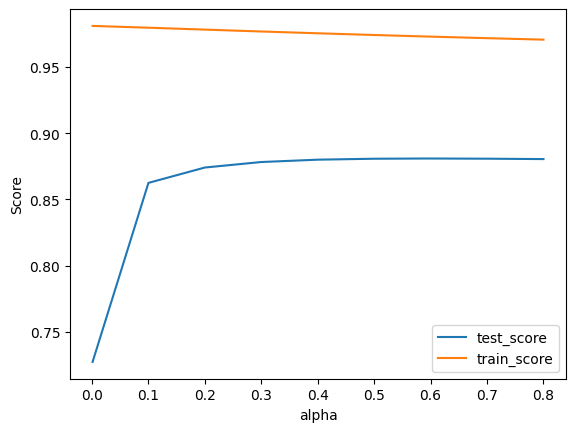

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cv_result['param_alpha'] , cv_result['mean_test_score'])
plt.plot(cv_result['param_alpha'] , cv_result['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel("Score")
plt.legend(['test_score', 'train_score'])
plt.show()

In [ ]:
cv_result[['param_alpha','mean_test_score', 'mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.001,0.727123,0.981145
1,0.100,0.862485,0.979797
2,0.200,0.874090,0.978356
3,0.300,0.878253,0.976938
4,0.400,0.880027,0.975578
5,0.500,0.880739,0.974283
6,0.591,0.880906,0.973161
7,0.592,0.880906,0.973149
8,0.593,0.880906,0.973137
9,0.594,0.880906,0.973125


In [ ]:
params = {'alpha' : [0.001 , 0.1 , 0.5 , 1.0 , 1.5 , 2.0 , 3.0 , 4.0 , 5.0 , 6.0, 7.0 , 8.0 , 8.5 ,  8.8 , 8.84 , 8.499 , 8.85 , 8.851 , 8.90 , 8.95, 9.0 , 10.0]}

lasso2 = Lasso()
chunks2 = KFold(n_splits=10, shuffle=True, random_state=100)
model2 = GridSearchCV(estimator=lasso2 , param_grid=params, scoring='r2',cv=chunks2,return_train_score=True)
model2.fit(X_train,Y_train)

C:\Users\vimal\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.132e+07, tolerance: 7.819e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\vimal\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.467e+07, tolerance: 7.565e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\vimal\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

,estimator,Lasso()
,param_grid,"{'alpha': [0.001, 0.1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,8.85


In [ ]:
print(model2.best_estimator_)

Lasso(alpha=8.85)


In [ ]:
print(model2.best_score_)

0.8746703523716659


In [ ]:
cv_result_lasso = pd.DataFrame(model2.cv_results_)
cv_result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009524,0.001725,0.002204,0.000566,0.001,{'alpha': 0.001},0.924366,0.870883,0.805473,0.836178,...,0.980747,0.979999,0.980394,0.981524,0.982155,0.986448,0.979730,0.983812,0.981144,0.002404
1,0.010534,0.002988,0.003015,0.001168,0.100,{'alpha': 0.1},0.928113,0.878933,0.826688,0.863005,...,0.980737,0.979973,0.980385,0.981518,0.982144,0.986439,0.979723,0.983784,0.981131,0.002403
2,0.009061,0.002533,0.002473,0.000853,0.500,{'alpha': 0.5},0.938571,0.911171,0.836275,0.904271,...,0.980616,0.979782,0.980208,0.981403,0.981987,0.986285,0.979618,0.983579,0.980974,0.002401
3,0.005936,0.002390,0.001707,0.000350,1.000,{'alpha': 1.0},0.945655,0.923510,0.842284,0.928575,...,0.980336,0.979301,0.979713,0.981073,0.981590,0.985929,0.979416,0.983271,0.980635,0.002386
4,0.005793,0.002099,0.002495,0.000943,1.500,{'alpha': 1.5},0.949866,0.928673,0.844095,0.929745,...,0.979977,0.979022,0.979227,0.980578,0.981262,0.985571,0.979236,0.982907,0.980300,0.002350
5,0.005046,0.001402,0.001592,0.000284,2.000,{'alpha': 2.0},0.954540,0.933553,0.838137,0.923703,...,0.979778,0.978607,0.978855,0.980118,0.981008,0.985318,0.978961,0.982437,0.979967,0.002350
6,0.004058,0.001151,0.001433,0.000350,3.000,{'alpha': 3.0},0.959350,0.942165,0.832579,0.922016,...,0.979140,0.978032,0.977984,0.979420,0.980362,0.984557,0.978261,0.981575,0.979230,0.002341
7,0.004483,0.001417,0.001588,0.000360,4.000,{'alpha': 4.0},0.959725,0.949671,0.825929,0.925907,...,0.978570,0.977389,0.977132,0.978383,0.979478,0.983524,0.977585,0.980749,0.978390,0.002308
8,0.006806,0.001696,0.003358,0.001134,5.000,{'alpha': 5.0},0.960066,0.954754,0.817613,0.930153,...,0.977945,0.976687,0.976315,0.977355,0.978299,0.982512,0.976861,0.979939,0.977490,0.002310
9,0.005592,0.002131,0.002789,0.000938,6.000,{'alpha': 6.0},0.959460,0.956576,0.808627,0.933522,...,0.977289,0.975934,0.975387,0.976401,0.977478,0.981275,0.976121,0.978974,0.976628,0.002201


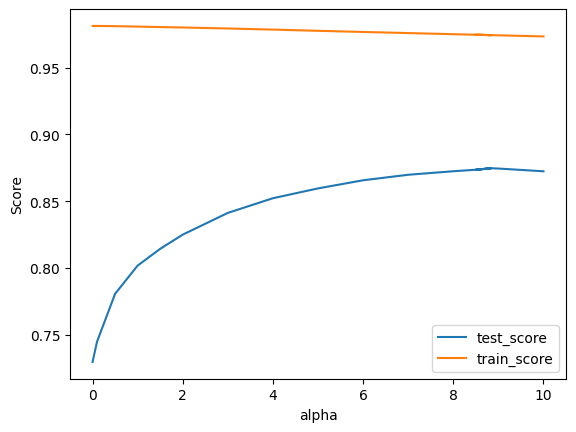

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cv_result_lasso['param_alpha'] , cv_result_lasso['mean_test_score'])
plt.plot(cv_result_lasso['param_alpha'] , cv_result_lasso['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel("Score")
plt.legend(['test_score', 'train_score'])
plt.show()